[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                          Index      Mean  Standard Deviation  Skewness  \
0           S&P 500 (2022-2024) -0.000011            0.012272 -0.125038   
1           S&P 500 (2001-2024)  0.000227            0.012299 -0.399327   
2  Nasdaq-Composite (2022-2024) -0.000107            0.016258 -0.093204   
3               DAX (2022-2024)  0.000087            0.011866  0.160719   
4               SMI (2022-2024) -0.000297            0.008904 -0.015639   
5            CAC-40 (2022-2024)  0.000086            0.011688  0.029106   

    Kurtosis  
0   1.261901  
1  10.895671  
2   0.857996  
3   4.244537  
4   2.083931  
5   3.628594  


[*********************100%%**********************]  1 of 1 completed


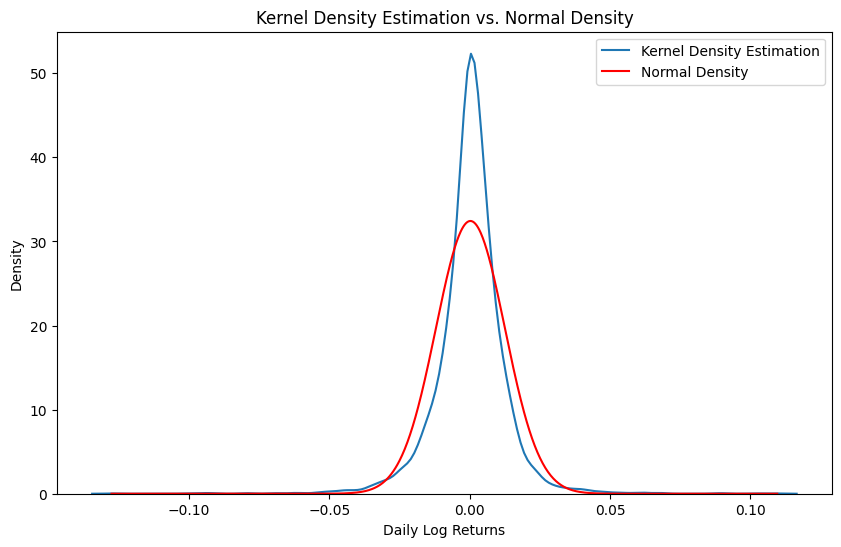

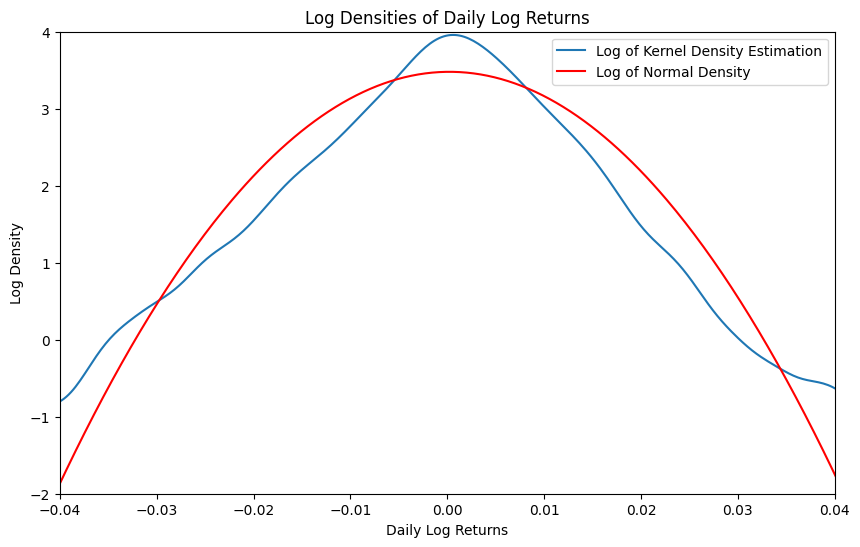

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13788\2510910396.py:170: RuntimeWarning: divide by zero encountered in divide
  chi2_statistic = np.sum((observed - expected)**2 / expected)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                          Index  PNormal-value  \
0           S&P 500 (2022-2024)            0.0   
1           S&P 500 (2001-2024)            0.0   
2  Nasdaq-Composite (2022-2024)            0.0   
3               DAX (2022-2024)            0.0   
4               SMI (2022-2024)            0.0   
5            CAC-40 (2022-2024)            0.0   

                       Class boundaries  
0  −0.0442 + 0.0025i, i = 0, . . . , 40  
1  −0.1277 + 0.0059i, i = 0, . . . , 40  
2  −0.0530 + 0.0031i, i = 0, . . . , 40  
3  −0.0451 + 0.0030i, i = 0, . . . , 40  
4  −0.0391 + 0.0019i, i = 0, . . . , 40  
5  −0.0509 + 0.0030i, i = 0, . . . , 40  


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# List of indices and their Yahoo Finance ticker symbols
indices = {
    'S&P 500 (2022-2024)': '^GSPC',
    'S&P 500 (2001-2024)': '^GSPC',
    'Nasdaq-Composite (2022-2024)': '^IXIC',
    'DAX (2022-2024)': '^GDAXI',
    'SMI (2022-2024)': '^SSMI',
    'CAC-40 (2022-2024)': '^FCHI'
}

# Function to fetch data and calculate statistics
def fetch_and_analyze(index_name, ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
    data.dropna(inplace=True)
    
    log_returns = data['Log_Return']
    mean = np.mean(log_returns)
    std_dev = np.std(log_returns)
    skewness = skew(log_returns)
    kurt = kurtosis(log_returns)
    
    return {
        'Index': index_name,
        'Mean': mean,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurt
    }

# Define the time periods
periods = {
    'S&P 500 (2022-2024)': ('2022-01-01', '2024-01-01'),
    'S&P 500 (2001-2024)': ('2001-01-01', '2024-01-01'),
    'Nasdaq-Composite (2022-2024)': ('2022-01-01', '2024-01-01'),
    'DAX (2022-2024)': ('2022-01-01', '2024-01-01'),
    'SMI (2022-2024)': ('2022-01-01', '2024-01-01'),
    'CAC-40 (2022-2024)': ('2022-01-01', '2024-01-01')
}

# Fetch data and calculate statistics for each index and time period
results = []
for index_name, ticker in indices.items():
    start_date, end_date = periods[index_name]
    stats = fetch_and_analyze(index_name, ticker, start_date, end_date)
    results.append(stats)

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

# Fetch historical data for S&P 500
sp500_data = yf.download('^GSPC', start='2001-01-01', end='2024-01-01')

# Calculate daily log returns
sp500_data['Log_Return'] = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1))

# Drop NaN values
log_returns = sp500_data['Log_Return'].dropna()

# Calculate empirical statistics
mean_empirical = np.mean(log_returns)
std_dev_empirical = np.std(log_returns)

# Generate data for normal distribution
x = np.linspace(log_returns.min(), log_returns.max(), 1000)
normal_density = norm.pdf(x, mean_empirical, std_dev_empirical)

# Plot (a) Normal and Gaussian kernel density estimators
plt.figure(figsize=(10, 6))
sns.kdeplot(log_returns, bw_adjust=1.06, label='Kernel Density Estimation')
plt.plot(x, normal_density, label='Normal Density', color='r')
plt.title('Kernel Density Estimation vs. Normal Density')
plt.xlabel('Daily Log Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate log of KDE and normal density
kde = stats.gaussian_kde(log_returns, bw_method='silverman')
kde_density = kde(x)
log_kde_density = np.log(kde_density)
log_normal_density = np.log(normal_density)

# Plot (b) log densities
plt.figure(figsize=(10, 6))
plt.plot(x, log_kde_density, label='Log of Kernel Density Estimation')
plt.plot(x, log_normal_density, label='Log of Normal Density', color='r')
plt.title('Log Densities of Daily Log Returns')
plt.xlabel('Daily Log Returns')
plt.ylabel('Log Density')
plt.legend()

# Adjust x and y axis limits to match the provided image
plt.xlim(-0.04, 0.04)
plt.ylim(-2, 4)

# Set x and y ticks to match the provided image
plt.xticks(np.arange(-0.04, 0.05, 0.01))
plt.yticks(np.arange(-2, 5, 1))

plt.show()
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm, chi2

# List of indices and their Yahoo Finance ticker symbols
indices = {
    'S&P 500 (2022-2024)': '^GSPC',
    'S&P 500 (2001-2024)': '^GSPC',
    'Nasdaq-Composite (2022-2024)': '^IXIC',
    'DAX (2022-2024)': '^GDAXI',
    'SMI (2022-2024)': '^SSMI',
    'CAC-40 (2022-2024)': '^FCHI'
}

# Define the time periods
periods = {
    'S&P 500 (2022-2024)': ('2022-01-01', '2024-01-01'),
    'S&P 500 (2001-2024)': ('2001-01-01', '2024-01-01'),
    'Nasdaq-Composite (2022-2024)': ('2022-01-01', '2024-01-01'),
    'DAX (2022-2024)': ('2022-01-01', '2024-01-01'),
    'SMI (2022-2024)': ('2022-01-01', '2024-01-01'),
    'CAC-40 (2022-2024)': ('2022-01-01', '2024-01-01')
}

# Function to fetch data and calculate log returns
def fetch_and_analyze(index_name, ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
    data.dropna(inplace=True)
    return data['Log_Return']

# Function to perform chi-square test for normality
def chi_square_test(index_name, log_returns):
    num_intervals = 40  # Number of intervals for partitioning
    intervals = np.linspace(log_returns.min(), log_returns.max(), num_intervals + 1)
    observed, _ = np.histogram(log_returns, bins=intervals)
    n = len(log_returns)
    
    # Calculate expected frequencies assuming normal distribution
    mean_empirical = np.mean(log_returns)
    std_dev_empirical = np.std(log_returns)
    expected = np.array([norm.cdf(intervals[i+1], mean_empirical, std_dev_empirical) 
                         - norm.cdf(intervals[i], mean_empirical, std_dev_empirical) for i in range(num_intervals)])
    expected *= n
    
    # Ensure expected frequencies are at least 5 for each interval
    if np.any(expected < 5):
        pass  # Adjust intervals or apply another method if needed
    
    # Calculate chi-square statistic
    chi2_statistic = np.sum((observed - expected)**2 / expected)
    
    # Calculate degrees of freedom
    degrees_freedom = num_intervals - 1 - 2  # Adjust based on parameters estimated
    
    # Calculate p-value
    p_value = 1 - chi2.cdf(chi2_statistic, degrees_freedom)
    
    # Calculate dynamic class boundaries
    class_boundaries = f'−{abs(intervals[0]):.4f} + {abs((intervals[1] - intervals[0])):.4f}i, i = 0, . . . , {num_intervals}'
    
    return chi2_statistic, p_value, class_boundaries

# Perform chi-square test for each index and time period
results = []
for index_name, ticker in indices.items():
    start_date, end_date = periods[index_name]
    log_returns = fetch_and_analyze(index_name, ticker, start_date, end_date)
    chi2_statistic, p_value, class_boundaries = chi_square_test(index_name, log_returns)
    results.append({
        'Index': index_name,
        'PNormal-value': p_value,
        'Class boundaries': class_boundaries
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


[*********************100%%**********************]  1 of 1 completed


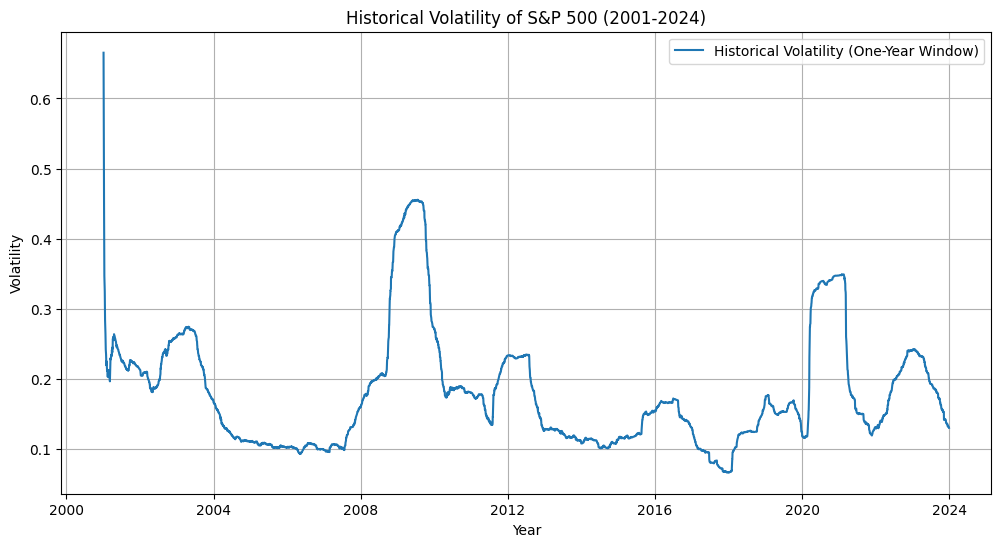

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for S&P 500
ticker_symbol = '^GSPC'

# Define the time period
start_date = '2001-01-01'
end_date = '2024-01-01'

# Fetch historical data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily log returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Function to compute historical volatility over a rolling one-year window
def calculate_historical_volatility(log_returns, window=250):
    return log_returns.rolling(window, min_periods=1).std() * np.sqrt(250)

# Calculate historical volatility
data['Historical_Volatility'] = calculate_historical_volatility(data['Log_Return'])

# Plotting historical volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Historical_Volatility'], label='Historical Volatility (One-Year Window)')
plt.title('Historical Volatility of S&P 500 (2001-2024)')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed


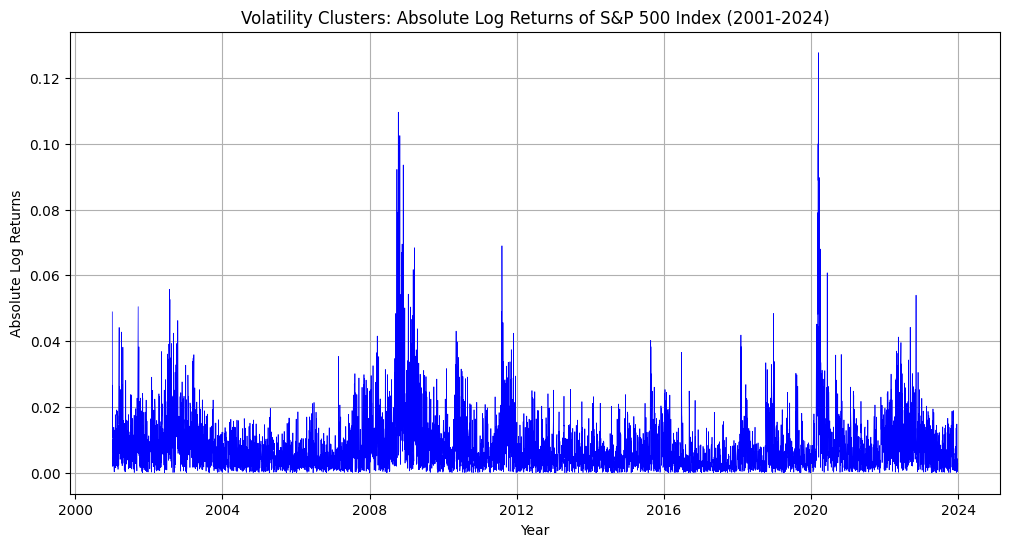

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol and time period
ticker_symbol = "^GSPC"
start_date = "2001-01-01"
end_date = "2024-01-01"

# Fetch historical data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily log returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Calculate absolute log returns (volatility clusters)
data['Absolute_Log_Return'] = data['Log_Return'].abs()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Absolute_Log_Return'], color='blue', linewidth=0.5)
plt.title('Volatility Clusters: Absolute Log Returns of S&P 500 Index (2001-2024)')
plt.xlabel('Year')
plt.ylabel('Absolute Log Returns')
plt.grid(True)
plt.show()

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPY240731C00320000 2024-07-15 19:23:29+00:00   320.0     243.22    0.00   
1    SPY240731C00325000 2024-04-25 15:52:58+00:00   325.0     177.87  205.82   
2    SPY240731C00330000 2024-07-05 17:01:23+00:00   330.0     224.77    0.00   
3    SPY240731C00335000 2024-06-28 13:52:00+00:00   335.0     214.66    0.00   
4    SPY240731C00340000 2024-04-25 15:52:50+00:00   340.0     163.12  191.01   
..                  ...                       ...     ...        ...     ...   
170  SPY240731C00615000 2024-07-16 14:36:10+00:00   615.0       0.02    0.00   
171  SPY240731C00620000 2024-07-16 13:49:09+00:00   620.0       0.01    0.00   
172  SPY240731C00625000 2024-07-16 16:15:55+00:00   625.0       0.01    0.00   
173  SPY240731C00635000 2024-07-15 13:58:54+00:00   635.0       0.02    0.00   
174  SPY240731C00645000 2024-07-16 19:17:02+00:00   645.0       0.01    0.00   

        ask  change  perc

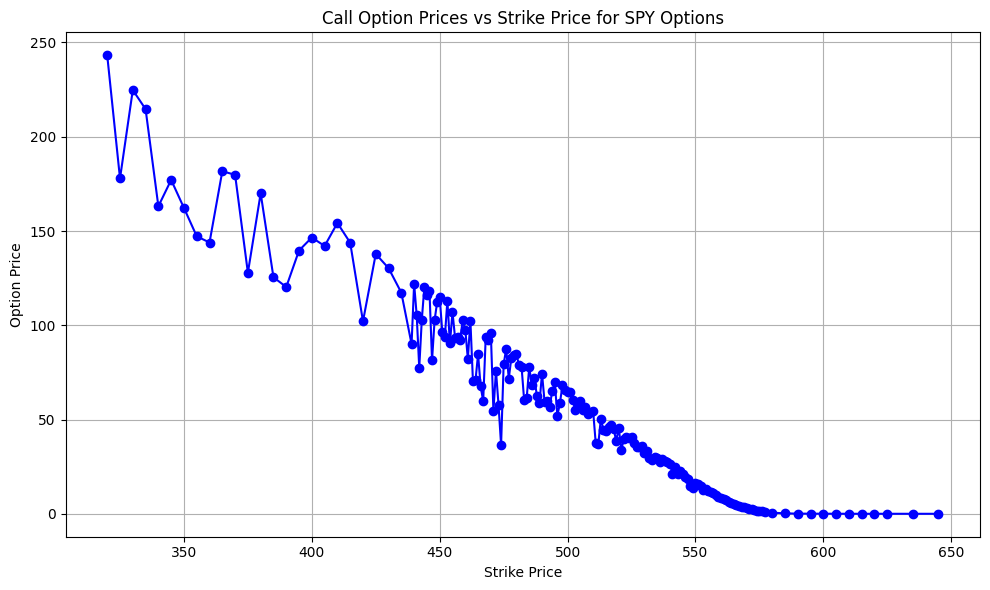

In [4]:
# Define the ticker symbol and expiry date (if desired)
ticker_symbol = 'SPY'  # Example: SPDR S&P 500 ETF Trust
expiry_date = '2024-07-31'  # Example: June 21, 2024

# Fetch options data
ticker = yf.Ticker(ticker_symbol)
options_df = ticker.option_chain(expiry_date)

# Display the options data
print(options_df)
# Extract strike prices and call option prices
strike_prices = options_df.calls.strike.tolist()
call_prices = options_df.calls.lastPrice.tolist()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, call_prices, marker='o', linestyle='-', color='b')

plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.tight_layout()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error
from datetime import datetime
from scipy.stats import norm

In [70]:
import yfinance as yf
from datetime import datetime, timedelta

ticker_symbol = 'SPY'
end_date = '2024-07-07'

# Calculate start date as 1 year before the end date
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')
start_date_dt = end_date_dt - timedelta(days=365)
start_date = start_date_dt.strftime('%Y-%m-%d')

data = yf.download(ticker_symbol, start=start_date, end=end_date)
data['log_returns'] = np.log(data['Close'] / data['Close'].shift(1))
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-10  438.179993  439.839996  437.589996  439.660004  433.595123   
2023-07-11  440.450012  442.970001  439.440002  442.459991  436.356445   
2023-07-12  446.390015  447.480011  444.910004  446.019989  439.867371   
2023-07-13  447.899994  450.380005  447.450012  449.559998  443.358582   
2023-07-14  450.480011  451.359985  448.489990  449.279999  443.082428   

              Volume  log_returns  
Date                               
2023-07-10  62443500          NaN  
2023-07-11  64463800     0.006348  
2023-07-12  91924500     0.008014  
2023-07-13  72425200     0.007906  
2023-07-14  69761800    -0.000623  


In [71]:
# Drop missing values
hist = data.dropna()
hist.head()

,Open,High,Low,Close,Adj Close,Volume,log_returns
Date,,,,,,,
2023-07-11,440.450012,442.970001,439.440002,442.459991,436.356445,64463800,0.006348
2023-07-12,446.390015,447.480011,444.910004,446.019989,439.867371,91924500,0.008014
2023-07-13,447.899994,450.380005,447.450012,449.559998,443.358582,72425200,0.007906
2023-07-14,450.480011,451.359985,448.489990,449.279999,443.082428,69761800,-0.000623
2023-07-17,449.130005,451.929993,449.079987,450.839996,444.620911,52680200,0.003466


In [72]:
# Simulation parameters
expiry_date = '2024-07-31'


In [73]:
# Calculate time to expiration in years from the current date
current_date = datetime.now()
expiry_datetime = datetime.strptime(expiry_date, '%Y-%m-%d')
T = (expiry_datetime - current_date).days / 365
print(current_date)
print(expiry_datetime )
print((expiry_datetime - current_date).days)
print(T)

2024-07-12 22:45:18.438962
2024-07-31 00:00:00
18
0.049315068493150684


In [74]:
# Calculate parameters for Kou model
alpha = hist['log_returns'].mean() * 252  # Annualized drift
sigma = hist['log_returns'].std() * np.sqrt(252)  # Annualized volatility
print(alpha)
print(sigma)

0.2351165786725213
0.11231672121324024


In [75]:
# Identify jump events with optimized threshold
threshold = hist['log_returns'].std() * 2  # Adjusted jump threshold (2 standard deviations)
jumps = hist[np.abs(hist['log_returns']) > threshold]
print(threshold)
print(jumps)

0.014150576781162213
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-29  442.649994  449.450012  442.459991  449.160004  442.964081   
2023-09-15  447.140015  447.480011  442.920013  443.369995  438.796295   
2023-09-21  435.700012  435.970001  431.230011  431.390015  426.939880   
2023-09-26  429.089996  429.820007  425.019989  425.880005  421.486694   
2023-10-25  421.890015  421.920013  417.019989  417.549988  413.242615   
2023-11-02  426.579987  430.920013  426.559998  430.760010  426.316406   
2023-11-10  435.980011  440.929993  433.829987  440.609985  436.064728   
2023-11-14  446.320007  450.059998  446.089996  448.730011  444.101044   
2024-01-08  468.429993  474.750000  468.299988  474.600006  471.608521   
2024-01-31  488.619995  489.079987  482.859985  482.880005  479.836334   
2024-02-22  504.010010  508.489990  503.019989  507.500000  504.301147   
2024-04-30  508.5

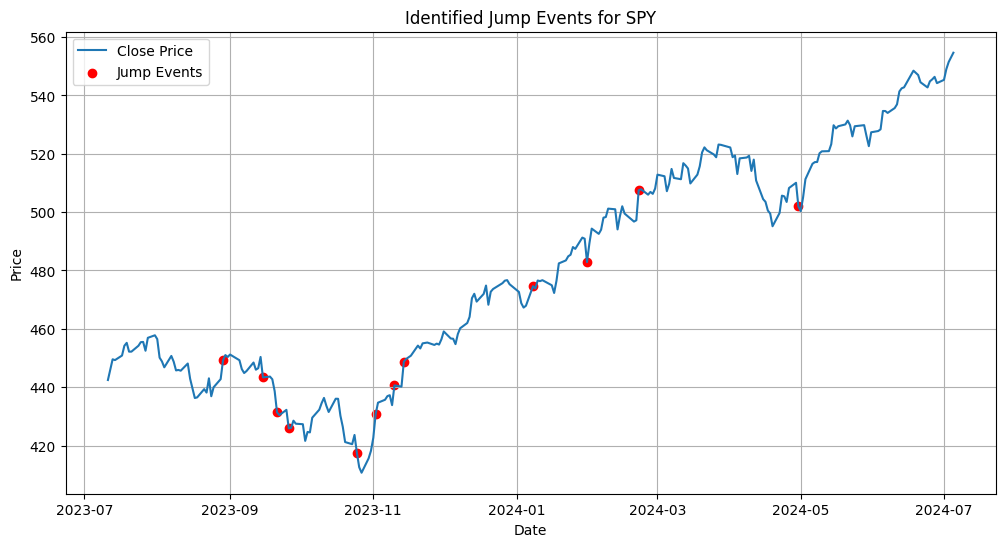

In [76]:
# Example plot to visualize jump events
plt.figure(figsize=(12, 6))
plt.plot(hist.index, hist['Close'], label='Close Price')
plt.scatter(jumps.index, jumps['Close'], color='red', label='Jump Events')
plt.title(f'Identified Jump Events for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



In [77]:
# Fetch risk-free rate (3-month Treasury bill rate)
risk_free_rate = yf.Ticker('^IRX')  # Ticker symbol for 3-month Treasury bill rate
risk_free_rate_data = risk_free_rate.history(period='1d')
current_rf_rate = risk_free_rate_data['Close'].iloc[-1] / 100  # Convert percentage to decimal
print(current_rf_rate)

0.05197999954223633


In [78]:
# Calculate jump sizes
positive_jumps = jumps[jumps['log_returns'] > 0]
negative_jumps = jumps[jumps['log_returns'] < 0]


In [79]:
eta_plus = positive_jumps['log_returns'].mean()
eta_minus = negative_jumps['log_returns'].mean()
print(eta_plus,eta_minus)

0.017115468365678326 -0.015664247548498437


In [80]:
# Calculate probabilities
total_jumps = len(jumps)
p_plus = len(positive_jumps) / total_jumps
p_minus = len(negative_jumps) / total_jumps
print(total_jumps)

12


In [81]:
# Calculate jump intensity
total_days = len(hist)
total_years = total_days / 252  # Approximate trading days in a year
lambda_p = total_jumps / total_years
print(lambda_p)
print(total_years)

12.144578313253012
0.9880952380952381


In [82]:
# Fetch current stock price of SPY from the last available data point
S0 = data['Close'].iloc[-1]
print(S0)

554.6400146484375


In [83]:
# Precompute constants
N = 252  # Number of time steps (daily)
dt = T / N  # Time step
num_paths = 20000  # Increase number of simulation paths for better accuracy
drift = alpha * dt
diffusion = sigma * np.sqrt(dt)
print(N)
print(dt)
print(num_paths)
print(drift)
print(diffusion)

252
0.00019569471624266145
20000
4.6011072147264444e-05
0.0015712090315301102


In [84]:
# Simulation for Kou model
S = np.zeros((num_paths, N + 1))
S[:, 0] = S0
print(S[:, 0])

[554.64001465 554.64001465 554.64001465 ... 554.64001465 554.64001465
 554.64001465]


In [85]:
for t in range(1, N + 1):
    dW = np.random.normal(0, 1, num_paths)
    jumps = np.random.poisson(lambda_p * dt, num_paths)
    jump_sizes = np.where(np.random.uniform(0, 1, num_paths) < p_plus,
                          1 + eta_plus,
                          1 + eta_minus) ** jumps - 1
    S[:, t] = S[:, t-1] * np.exp(drift - 0.5 * sigma**2 * dt + diffusion * dW + jump_sizes)
   

In [86]:
# Calculate the average simulated path
average_simulated_path = np.mean(S, axis=0)


In [95]:
def kou_model_call_price(S0, K, T, current_rf_rate, sigma, lambda_p, p_plus, eta_plus, eta_minus):
    num_simulations = 1000
    dt = T / N
    prices = np.zeros(num_simulations)
    for i in range(num_simulations):
        St = S0
        for _ in range(N):
            Z = np.random.normal()
            J = np.random.poisson(lambda_p * dt)
            if J > 0:
                Y = np.random.choice([1 + eta_plus, 1 + eta_minus], p=[p_plus, 1 - p_plus])
                St *= Y ** J
            St *= np.exp((current_rf_rate - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        prices[i] = max(St - K, 0)
    return np.exp(-current_rf_rate * T) * np.mean(prices)


In [96]:
# Fetch options data
ticker = yf.Ticker(ticker_symbol)
options_df = ticker.option_chain(expiry_date)

In [97]:
# Extract strike prices and call option prices
strike_prices = options_df.calls.strike.to_numpy()
market_prices = options_df.calls.lastPrice.to_numpy()


In [98]:
# Calculate Kou model prices
kou_model_prices = [kou_model_call_price(S0, K, T, current_rf_rate, sigma, lambda_p, p_plus, eta_plus, eta_minus) for K in strike_prices]


In [99]:
# Plotting
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

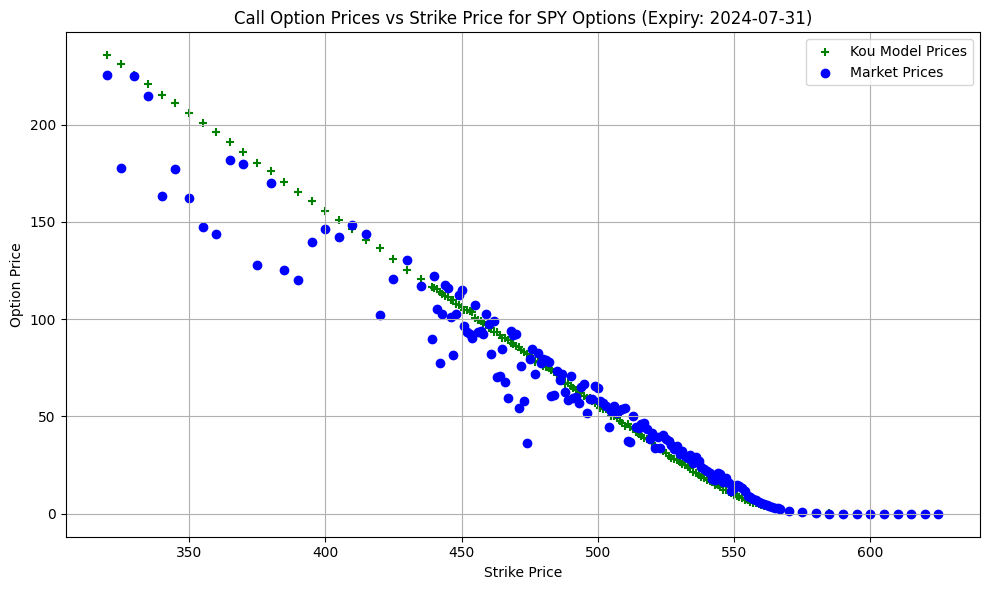

In [105]:
# Plotting
plt.figure(figsize=(10, 6))
# Plot Kou model prices as pluses
plt.scatter(strike_prices, kou_model_prices, marker='+', color='g', label='Kou Model Prices')
# Plot market prices as circles
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date})')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
# Calculate errors for Kou model
MAPE_kou = np.mean(np.abs((market_prices - kou_model_prices) / market_prices)) * 100
MAE_kou = np.mean(np.abs(market_prices - kou_model_prices))
RMSE_kou = np.sqrt(np.mean((market_prices - kou_model_prices)**2))

In [107]:
# Calculate R-squared for Kou model
SS_res_kou = np.sum((market_prices - kou_model_prices) ** 2)
SS_tot_kou = np.sum((market_prices - np.mean(market_prices)) ** 2)
R_squared_kou = 1 - (SS_res_kou / SS_tot_kou)


In [108]:
# Print results for Kou model
print(f"Metrics for Kou model calibration:")
print(f"MAPE: {MAPE_kou:.2f}%")
print(f"MAE: {MAE_kou:.2f}")
print(f"RMSE: {RMSE_kou:.2f}")
print(f"R-squared: {R_squared_kou:.2f}")

Metrics for Kou model calibration:
MAPE: 19.61%
MAE: 8.86
RMSE: 14.85
R-squared: 0.91


BLACK SCHOLES 

In [111]:
# Function to calculate Black-Scholes call option price
def black_scholes_call(S, K, T, current_rf_rate, sigma):
    d1 = (np.log(S / K) + (current_rf_rate + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-current_rf_rate * T) * norm.cdf(d2)
    return call_price




In [125]:


# Fetch options data
ticker = yf.Ticker(ticker_symbol)
options_df = ticker.option_chain(expiry_date)

# Extract strike prices and call option prices
strike_prices = options_df.calls.strike.to_numpy()
market_prices = options_df.calls.lastPrice.to_numpy()



# Calculate model prices using Black-Scholes with the current risk-free rate
black_scholes_model_prices = [black_scholes_call(S0, K, T, current_rf_rate, sigma) for K in strike_prices]



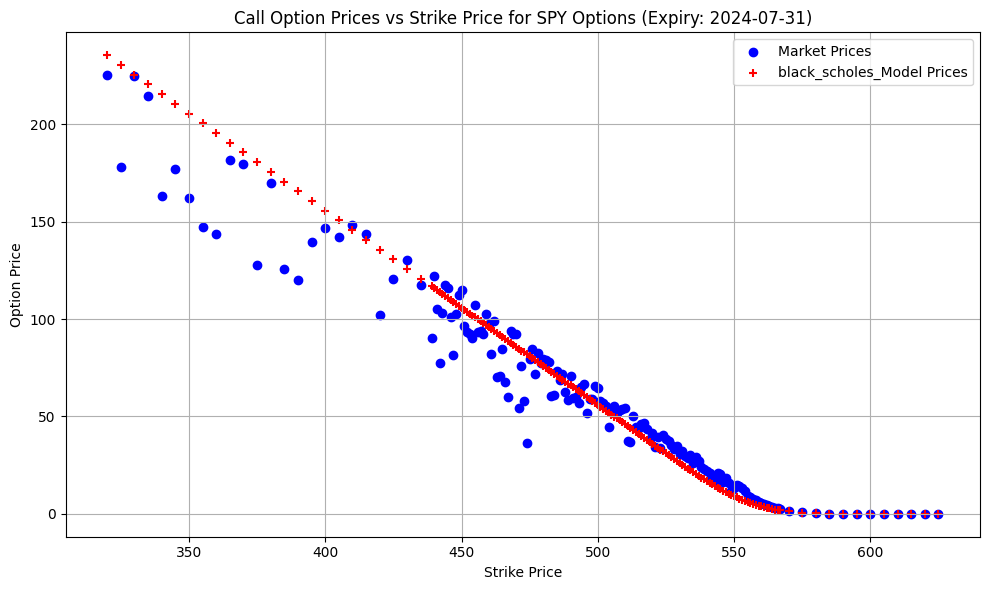

In [126]:


# Plotting
plt.figure(figsize=(10, 6))

# Plot market prices as circles
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')

# Plot model prices as pluses
plt.scatter(strike_prices, model_prices, marker='+', color='r', label='black_scholes_Model Prices')

plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date})')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [127]:


# Calculate errors for Black-Scholes model
APE = np.mean(np.abs((market_prices - model_prices) / market_prices)) * 100
AAE = np.mean(np.abs(market_prices - model_prices))
RMSE = np.sqrt(np.mean((market_prices - model_prices)**2))

# Calculate R-squared for Black-Scholes model
SS_res = np.sum((market_prices - model_prices) ** 2)
SS_tot = np.sum((market_prices - np.mean(market_prices)) ** 2)
R_squared = 1 - (SS_res / SS_tot)

# Print results for Black-Scholes model
print(f"Metrics for Black-Scholes model calibration log:")
print(f"MAPE: {APE:.2f}%")
print(f"MAE: {AAE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"R-squared: {R_squared:.2f}")


Metrics for Black-Scholes model calibration log:
MAPE: 20.93%
MAE: 8.97
RMSE: 14.76
R-squared: 0.91


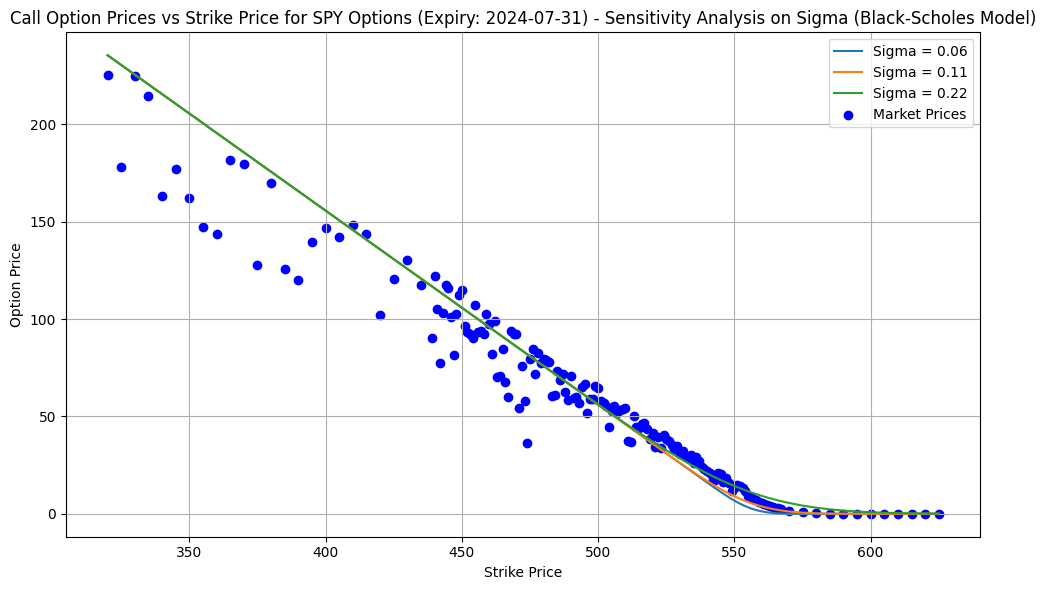

In [139]:
# Sensitivity analysis on volatility (sigma) for Black-Scholes model
sigma_values_bs = [sigma / 2, sigma, sigma * 2]
black_scholes_model_prices_sigma = []

for sigma_value in sigma_values_bs:
    black_scholes_model_prices_sigma.append([black_scholes_call(S0, K, T, current_rf_rate, sigma_value) for K in strike_prices])

# Plotting sensitivity analysis results for sigma in Black-Scholes model
plt.figure(figsize=(10, 6))
for i, sigma_value in enumerate(sigma_values_bs):
    plt.plot(strike_prices, black_scholes_model_prices_sigma[i], label=f'Sigma = {sigma_value:.2f}')
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date}) - Sensitivity Analysis on Sigma (Black-Scholes Model)')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


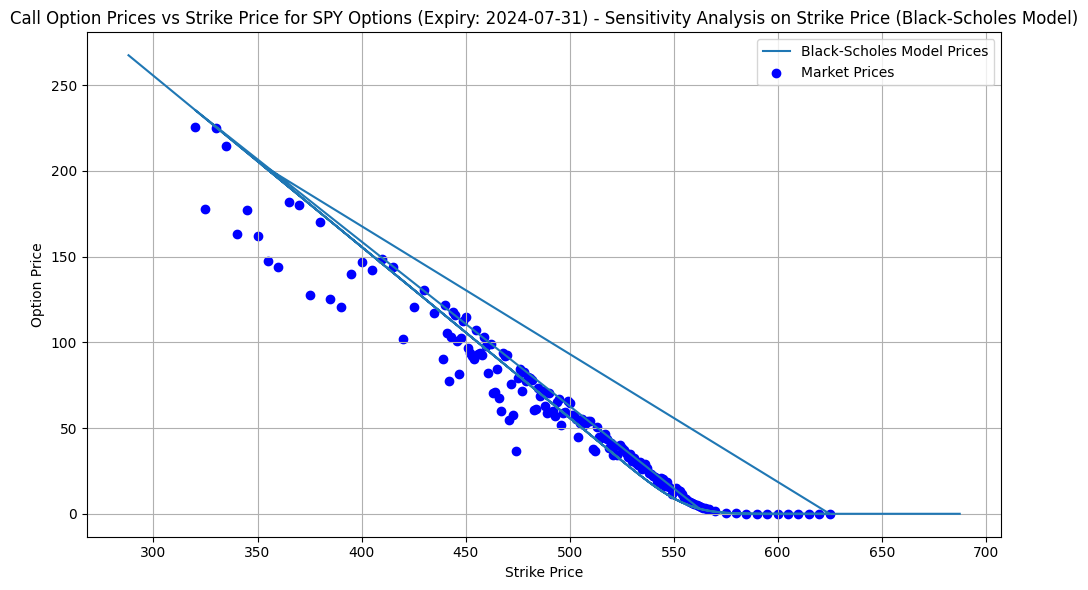

In [140]:
# Sensitivity analysis on strike price (K) for Black-Scholes model
strike_prices_bs = [K * 0.9 for K in strike_prices] + [K for K in strike_prices] + [K * 1.1 for K in strike_prices]
black_scholes_model_prices_strike = []

for K_value in strike_prices_bs:
    black_scholes_model_prices_strike.append(black_scholes_call(S0, K_value, T, current_rf_rate, sigma))

# Plotting sensitivity analysis results for strike price in Black-Scholes model
plt.figure(figsize=(10, 6))
plt.plot(strike_prices_bs, black_scholes_model_prices_strike, label=f'Black-Scholes Model Prices')
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date}) - Sensitivity Analysis on Strike Price (Black-Scholes Model)')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


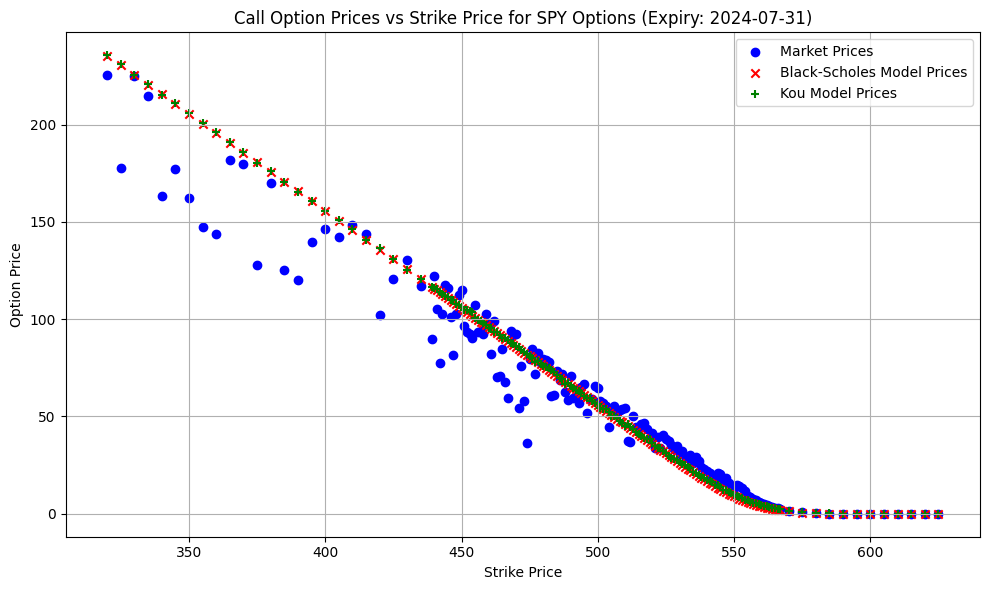

In [129]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot market prices as circles
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')

# Plot Black-Scholes model prices as crosses
plt.scatter(strike_prices, black_scholes_model_prices, marker='x', color='r', label='Black-Scholes Model Prices')

# Plot Kou model prices as pluses
plt.scatter(strike_prices, kou_model_prices, marker='+', color='g', label='Kou Model Prices')

plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date})')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [130]:
# Initialize arrays for antithetic variates
dW_pos = np.random.normal(0, 1, (num_paths, N))  # Positive normal increments
dW_neg = -dW_pos  # Negative normal increments (antithetic variates)

In [131]:
# Initialize arrays for asset paths
S_pos = np.zeros((num_paths, N + 1))
S_neg = np.zeros((num_paths, N + 1))
S_pos[:, 0] = S0
S_neg[:, 0] = S0

In [132]:
# Simulation using antithetic variates
for t in range(1, N + 1):
    jumps_pos = np.random.poisson(lambda_p * dt, num_paths)
    jumps_neg = np.random.poisson(lambda_p * dt, num_paths)
    
    jump_sizes_pos = np.where(np.random.uniform(0, 1, num_paths) < p_plus,
                              1 + eta_plus,
                              1 + eta_minus) ** jumps_pos - 1
    jump_sizes_neg = np.where(np.random.uniform(0, 1, num_paths) < p_plus,
                              1 + eta_plus,
                              1 + eta_minus) ** jumps_neg - 1
    
    S_pos[:, t] = S_pos[:, t-1] * np.exp(drift - 0.5 * sigma**2 * dt + diffusion * dW_pos[:, t-1] + jump_sizes_pos)
    S_neg[:, t] = S_neg[:, t-1] * np.exp(drift - 0.5 * sigma**2 * dt + diffusion * dW_neg[:, t-1] + jump_sizes_neg)

# Combine positive and negative paths for calculation
S_combined = np.concatenate((S_pos, S_neg), axis=0)

# Calculate the average simulated path
average_simulated_path_antithetic = np.mean(S_combined, axis=0)

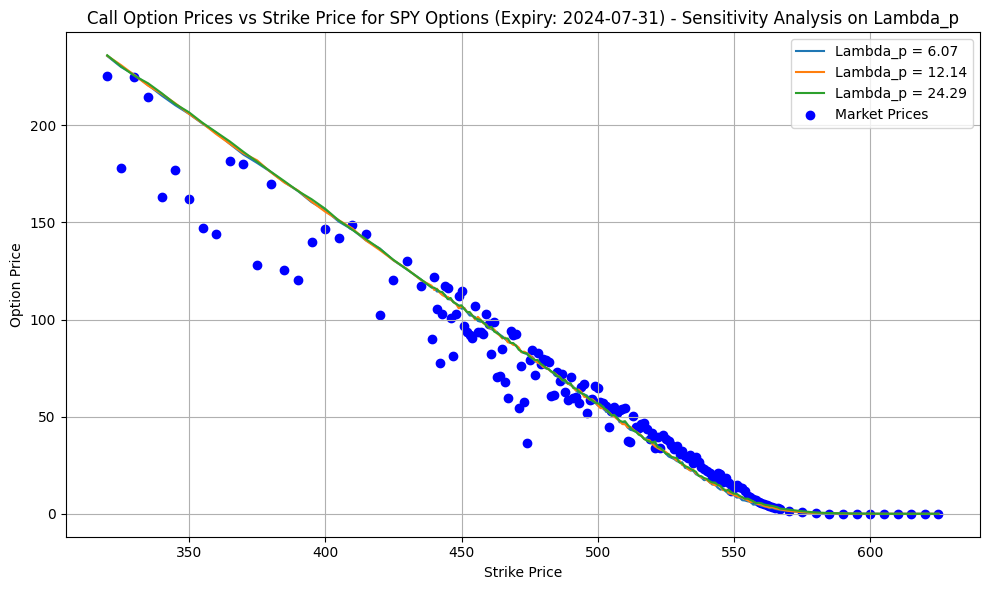

In [135]:
# Sensitivity analysis on jump intensity (lambda_p)
lambda_p_values = [lambda_p / 2, lambda_p, lambda_p * 2]
kou_model_prices_sensitivity = []

for lambda_p_value in lambda_p_values:
    S = np.zeros((num_paths, N + 1))
    S[:, 0] = S0

    for t in range(1, N + 1):
        dW = np.random.normal(0, 1, num_paths)
        jumps = np.random.poisson(lambda_p_value * dt, num_paths)
        jump_sizes = np.where(np.random.uniform(0, 1, num_paths) < p_plus,
                              1 + eta_plus,
                              1 + eta_minus) ** jumps - 1
        S[:, t] = S[:, t-1] * np.exp(drift - 0.5 * sigma**2 * dt + diffusion * dW + jump_sizes)

    kou_model_prices_sensitivity.append([kou_model_call_price(S0, K, T, current_rf_rate, sigma, lambda_p_value, p_plus, eta_plus, eta_minus) for K in strike_prices])

# Plotting sensitivity analysis results
plt.figure(figsize=(10, 6))
for i, lambda_p_value in enumerate(lambda_p_values):
    plt.plot(strike_prices, kou_model_prices_sensitivity[i], label=f'Lambda_p = {lambda_p_value:.2f}')
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date}) - Sensitivity Analysis on Lambda_p')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Repeat sensitivity analysis for other parameters (sigma, eta_plus, eta_minus) similarly


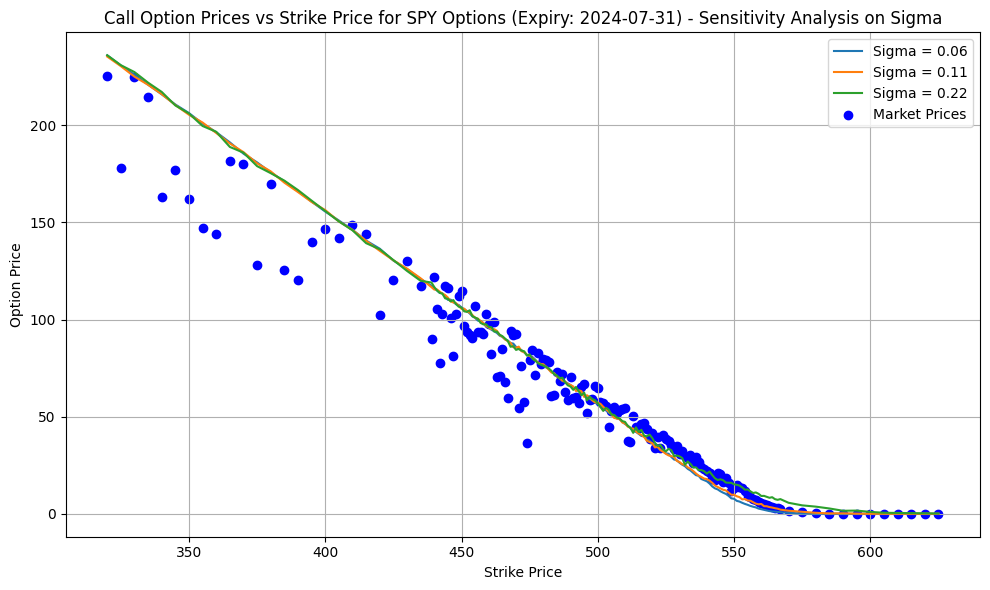

In [137]:
# Sensitivity analysis on volatility (sigma)
sigma_values = [sigma / 2, sigma, sigma * 2]
kou_model_prices_sigma = []

for sigma_value in sigma_values:
    diffusion_value = sigma_value * np.sqrt(dt)

    S = np.zeros((num_paths, N + 1))
    S[:, 0] = S0

    for t in range(1, N + 1):
        dW = np.random.normal(0, 1, num_paths)
        jumps = np.random.poisson(lambda_p * dt, num_paths)
        jump_sizes = np.where(np.random.uniform(0, 1, num_paths) < p_plus,
                              1 + eta_plus,
                              1 + eta_minus) ** jumps - 1
        S[:, t] = S[:, t-1] * np.exp(drift - 0.5 * sigma_value**2 * dt + diffusion_value * dW + jump_sizes)

    kou_model_prices_sigma.append([kou_model_call_price(S0, K, T, current_rf_rate, sigma_value, lambda_p, p_plus, eta_plus, eta_minus) for K in strike_prices])

# Plotting sensitivity analysis results for sigma
plt.figure(figsize=(10, 6))
for i, sigma_value in enumerate(sigma_values):
    plt.plot(strike_prices, kou_model_prices_sigma[i], label=f'Sigma = {sigma_value:.2f}')
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date}) - Sensitivity Analysis on Sigma')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


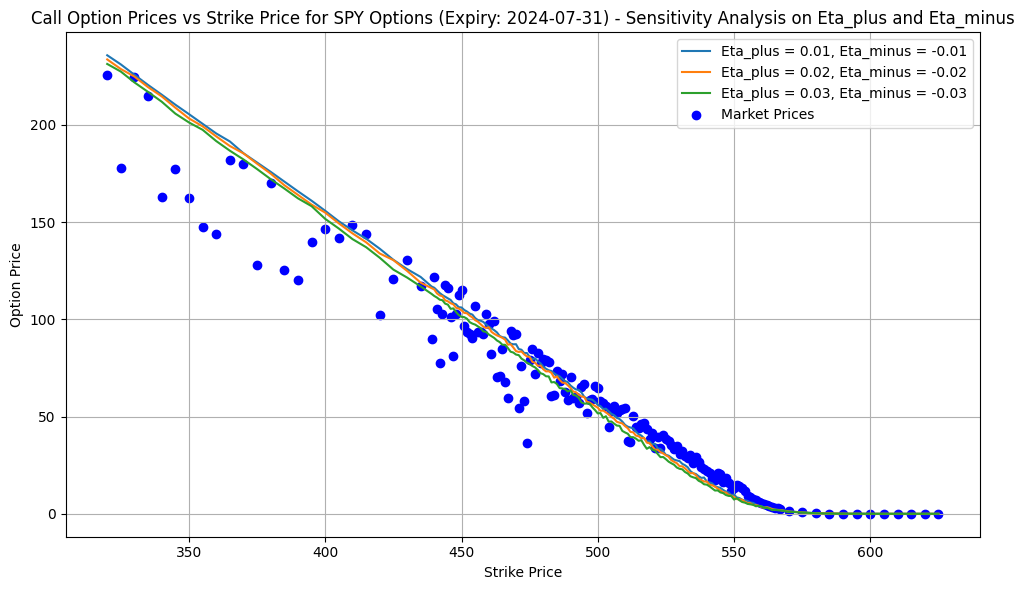

In [138]:
# Sensitivity analysis on jump sizes (eta_plus and eta_minus)
eta_plus_values = [eta_plus / 2, eta_plus, eta_plus * 2]
eta_minus_values = [eta_minus / 2, eta_minus, eta_minus * 2]
kou_model_prices_eta = []

for eta_plus_value in eta_plus_values:
    for eta_minus_value in eta_minus_values:
        jumps_plus = np.log(1 + eta_plus_value)
        jumps_minus = np.log(1 + eta_minus_value)
        
        S = np.zeros((num_paths, N + 1))
        S[:, 0] = S0

        for t in range(1, N + 1):
            dW = np.random.normal(0, 1, num_paths)
            jumps = np.random.poisson(lambda_p * dt, num_paths)
            jump_sizes = np.where(np.random.uniform(0, 1, num_paths) < p_plus,
                                  1 + eta_plus_value,
                                  1 + eta_minus_value) ** jumps - 1
            S[:, t] = S[:, t-1] * np.exp(drift - 0.5 * sigma**2 * dt + diffusion * dW + jump_sizes)

        kou_model_prices_eta.append([kou_model_call_price(S0, K, T, current_rf_rate, sigma, lambda_p, p_plus, eta_plus_value, eta_minus_value) for K in strike_prices])

# Plotting sensitivity analysis results for eta_plus and eta_minus
plt.figure(figsize=(10, 6))
for i, (eta_plus_value, eta_minus_value) in enumerate(zip(eta_plus_values, eta_minus_values)):
    plt.plot(strike_prices, kou_model_prices_eta[i], label=f'Eta_plus = {eta_plus_value:.2f}, Eta_minus = {eta_minus_value:.2f}')
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date}) - Sensitivity Analysis on Eta_plus and Eta_minus')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29428\1413855060.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


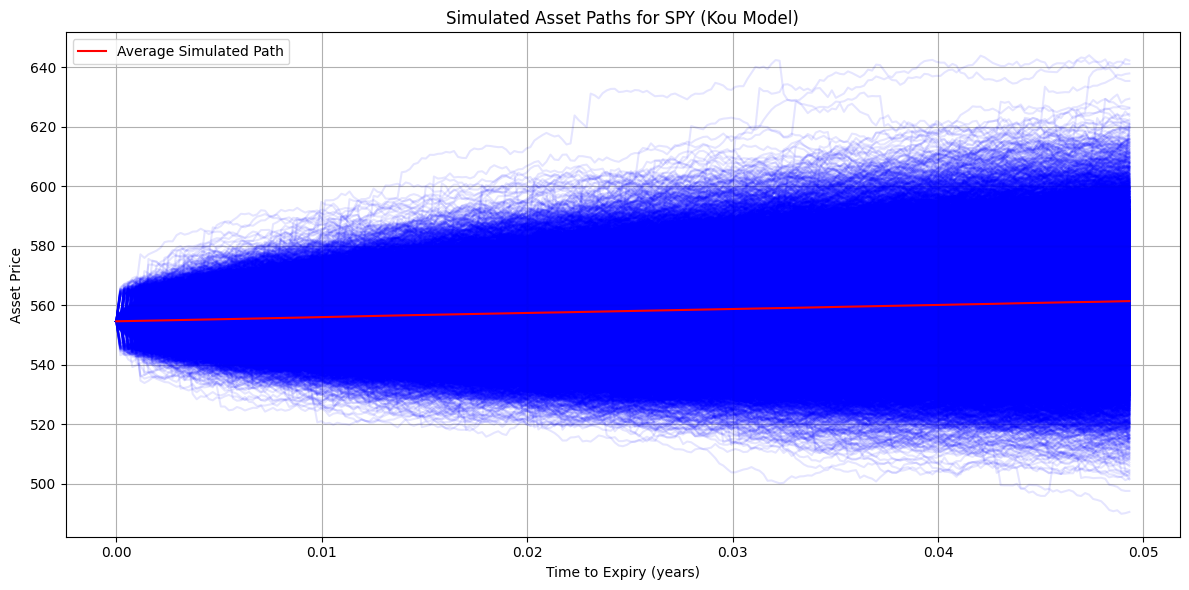

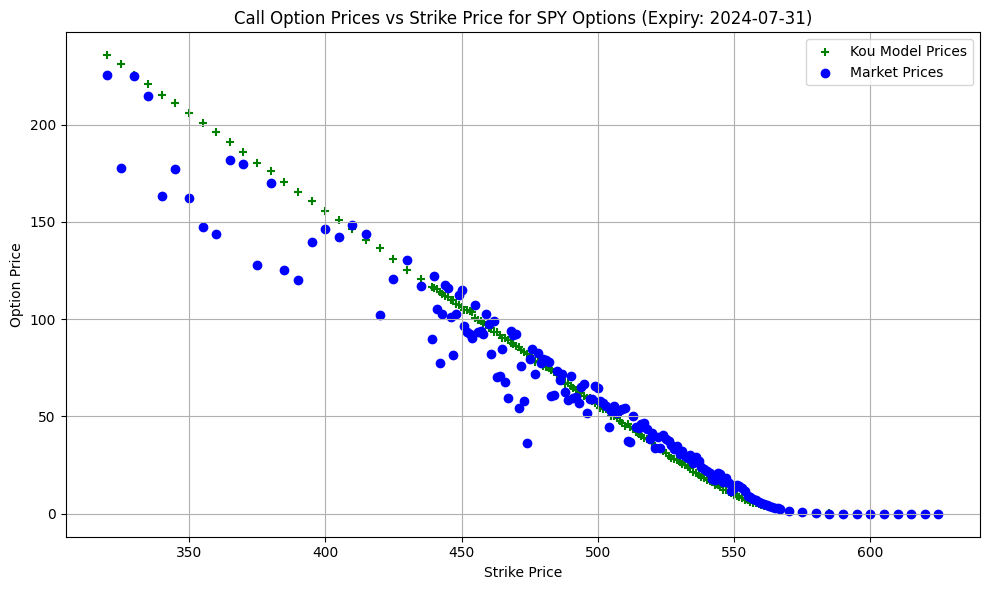

In [136]:
# Plot simulated asset paths
plt.figure(figsize=(12, 6))
for i in range(num_paths):
    plt.plot(np.arange(N + 1) * dt, S[i], alpha=0.1, color='b')
plt.plot(np.arange(N + 1) * dt, average_simulated_path, color='r', label='Average Simulated Path')
plt.title(f'Simulated Asset Paths for {ticker_symbol} (Kou Model)')
plt.xlabel('Time to Expiry (years)')
plt.ylabel('Asset Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize option prices vs strike prices
plt.figure(figsize=(10, 6))
plt.scatter(strike_prices, kou_model_prices, marker='+', color='g', label='Kou Model Prices')
plt.scatter(strike_prices, market_prices, marker='o', color='b', label='Market Prices')
plt.title(f'Call Option Prices vs Strike Price for {ticker_symbol} Options (Expiry: {expiry_date})')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Additional plots for sensitivity analysis and other parameter variations
